<h1>Project: Supervised Learning</h1>

### Import libraries
<a id='import_block'></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings

<a id='data_prep'></a>
## Data preparation

In [2]:
# import data
id_mapping = 'data/dataset_diabetes/IDs_mapping.csv'
diabetic_data = 'data/dataset_diabetes/diabetic_data.csv'

diabetic_df = pd.read_csv(diabetic_data)
id_mapping_df = pd.read_csv(id_mapping)

In [3]:
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
id_mapping_df.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [5]:
# examine shape of each dataset
print(diabetic_df.shape, '\n', id_mapping_df.shape)

(101766, 50) 
 (67, 2)


In [6]:
# check data for nulls
any(diabetic_df.isnull().sum())

False

<p>The code above suggests that the data contains no null values, but the data description provided alongside the data documents percentage of data missing for each feature:</p> 
<a id='percentage_missing'></a>

In [7]:
if True:
    from IPython.display import IFrame    
    display(IFrame("https://www.hindawi.com/journals/bmri/2014/781670/tab1/", width=950, height=400))

In [8]:
any(id_mapping_df.isnull().sum())

True

In [9]:
print('------Percentage missing------ \n')
id_mapping_df.isnull().sum() / id_mapping_df.shape[0] * 100

------Percentage missing------ 



admission_type_id    2.985075
description          7.462687
dtype: float64

<p>Since it's less than 10 percent missing, and the other dataset that it's mapping to contains no null values, these rows will be dropped.</p>

In [10]:
# drop rows containing nulls, assign to new df
id_map = id_mapping_df.dropna(0)
id_map.shape

(62, 2)

In [11]:
# examine data types
id_map.dtypes

admission_type_id    object
description          object
dtype: object

In [12]:
# unique values and value counts
print(len(id_map.admission_type_id.unique()),
      ' unique values in admission_type')
id_map.admission_type_id.unique()

32  unique values in admission_type


array(['1', '2', '3', '4', '5', '7', '8', 'discharge_disposition_id', '6',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '19', '20',
       '21', '22', '23', '24', '25', '26', '30', '27', '28', '29',
       'admission_source_id', '18'], dtype=object)

In [13]:
# examine number of unique values in each column
columns = [*diabetic_df.columns]
uniques = [len(diabetic_df[column].unique()) for column in columns]
unique_df = pd.DataFrame(zip(columns, uniques), columns = ['Columns', 'Total Unique'])
unique_df['Percentage Unique'] = unique_df['Total Unique'] / diabetic_df.shape[0] * 100
unique_df.sort_values(by = 'Percentage Unique')

,Columns,Total Unique,Percentage Unique
39,examide,1,0.000983
40,citoglipton,1,0.000983
37,troglitazone,2,0.001965
29,acetohexamide,2,0.001965
32,tolbutamide,2,0.001965
43,glipizide-metformin,2,0.001965
48,diabetesMed,2,0.001965
45,metformin-rosiglitazone,2,0.001965
47,change,2,0.001965
44,glimepiride-pioglitazone,2,0.001965


<p>Column <code>encounter_id</code> is dropped since it will not be useful for prediction</p>


In [14]:
diabetic_df.drop(['encounter_id', 'patient_nbr',
                  'discharge_disposition_id','admission_source_id'], axis = 1, inplace = True)

In [15]:
diabetic_df.describe()

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


<p>The <a href="#percentage_missing">documentation</a> containing feature descriptions also includes percentage of missing values within each feature.</p> <p>It is used as a reference and each column containing missing values is further examined manually since they're not readily identified using routine methods in python (<code>.isnull()</code> etc..). <code>Weight</code> is missing ~ 97% of its values. We look at the data in the column so that we can identify the input used to classify missing values within the data.</p>

In [16]:
diabetic_df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [17]:
# also important to note that the column dtype is shown as int64
# when each entry is actually a str
type(diabetic_df['weight'][0])

str

In [18]:
columns = diabetic_df.columns
columns_with_nulls = []

with warnings.catch_warnings(): # suppresses future warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    for column in columns:
        if '?' in diabetic_df[column].unique():
            count = diabetic_df[column].value_counts().to_dict().get('?')
            columns_with_nulls.append((column, count, count/diabetic_df.shape[0] * 100)) # appends True for '?' in column
            

missing = pd.DataFrame(columns_with_nulls, columns = ['feature', 'missing_values', 'percentage_missing'])
missing.sort_values(by='percentage_missing', ascending=False)

,feature,missing_values,percentage_missing
1,weight,98569,96.858479
3,medical_specialty,49949,49.082208
2,payer_code,40256,39.557416
0,race,2273,2.233555
6,diag_3,1423,1.398306
5,diag_2,358,0.351787
4,diag_1,21,0.020636


<p>In addressing missing values, we verify that the above output is aligned with what's described in the documentation.</p>

In [19]:
unique_df[unique_df['Columns'].isin([*missing.feature])].sort_values(by = 'Percentage Unique', ascending = False)

,Columns,Total Unique,Percentage Unique
20,diag_3,790,0.776291
19,diag_2,749,0.736002
18,diag_1,717,0.704558
11,medical_specialty,73,0.071733
10,payer_code,18,0.017688
5,weight,10,0.009826
2,race,6,0.005896


<p><code>diag_1</code>, <code>diag_2</code>, <code>diag_3</code> and <code>race</code> percent values missing are low enough to retain. Variation is checked before dropping columns containing many missing values.</p>

In [20]:
cols_to_drop = ['medical_specialty', 'payer_code', 'weight']
print('------Before------\n', diabetic_df.shape)
diabetic_df.drop(cols_to_drop, axis = 1,  inplace = True)

# for retained columns, the rows containing nulls are dropped
with warnings.catch_warnings(): # suppresses future warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    diabetic = diabetic_df[~(diabetic_df == '?').any(axis=1)]
print('\n------After------\n', diabetic.shape)

------Before------
 (101766, 46)

------After------
 (98053, 43)


### Functions
<a id='functions'></a>

In [21]:
def leftRightStrip(df, column, left, right):
    '''
    strips characters from column str values
    '''
    return df[column].map(lambda x: x.lstrip(left).rstrip(right))

In [22]:
def icd_Convert(df, col):
    '''
    converts ICD into general category
    '''
    df['temp']=np.nan
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    try:
        condition = (df[col]>=140) & (df[col]<=239)
        df.loc[condition,'temp']='Neoplasms'
    except:
        pass
    try:
        condition = (df[col]>=710) & (df[col]<=739)
        df.loc[condition,'temp']='Muscoloskeletal'
    except:
        pass
    try:
        condition = (df[col]>=800) & (df[col]<=999)
        df.loc[condition,'temp']='Injury'
    except:
        pass
    try:
        condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
        df.loc[condition,'temp']='Genitourinary'
    except:
        pass
    try:
        condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
        df.loc[condition,'temp']='Digestive'
    except:
        pass
    try:
        condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
        df.loc[condition,'temp']='Respiratory'
    except:
        pass
    try:
        condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
        df.loc[condition,'temp']='Circulatory'
    except:
        pass
    try:
        df[(df[col]==250)][col] = 'Diabetes'
    except:
        pass
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)
 

In [23]:
# removing Unknown/Invalid gender entries
diabetic = diabetic[diabetic['gender']!='Unknown/Invalid']

In [24]:
# group diagnoses columns together based on ICD classification

diagnoses = ['diag_1','diag_2','diag_3']

for diag in diagnoses:
    diabetic[diag] = diabetic[diag].str.replace('E','-')
    diabetic[diag] = diabetic[diag].str.replace('V','-')
    condition = diabetic[diag].str.contains('250')
    diabetic.loc[condition,diag] = '250'

diabetic[diagnoses] = diabetic[diagnoses].astype(float)

In [ ]:
for diag in diagnoses:
    icd_Convert(diabetic, diag)

diabetic.dropna(inplace = True)

In [26]:
diabetic[diagnoses].head()

,diag_1,diag_2,diag_3
1,Others,Diabetes,Others
2,Others,Diabetes,Others
3,Others,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes
5,Circulatory,Circulatory,Diabetes


### Exploring each variable
<a id="EDA"></a>
in this section, features are prepared for use in an ML algorithm.

In [27]:
# strip unwanted characters from age
diabetic['age'] = leftRightStrip(diabetic, 'age', '[', ')')
diabetic['age'] = diabetic['age'].str[1:].str.split('-',expand=True)[1]

Text(0.5, 0, 'Distribution of Age')

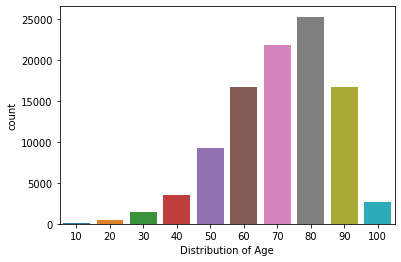

In [28]:
diabetic['age'] = diabetic['age'].astype(int)
sns.countplot(diabetic['age'])
plt.xlabel('Distribution of Age')

In [29]:
# examine numeric data, to check if categorical
numeric = [*diabetic.select_dtypes('int64').columns]

for num in numeric:
    x = len(diabetic[num].unique())
    print(x, ' unique values in ', num)
    print('\n')

10  unique values in  age


8  unique values in  admission_type_id


14  unique values in  time_in_hospital


118  unique values in  num_lab_procedures


7  unique values in  num_procedures


75  unique values in  num_medications


39  unique values in  number_outpatient


33  unique values in  number_emergency


20  unique values in  number_inpatient


14  unique values in  number_diagnoses




Text(0.5, 0, 'Number of lab procedures')

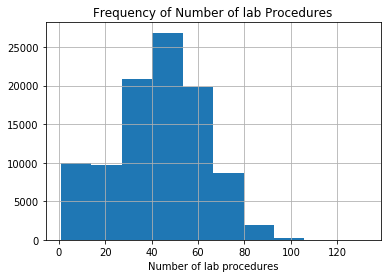

In [30]:
diabetic.num_lab_procedures.hist(bins = 10)
plt.title('Frequency of Number of lab Procedures')
plt.xlabel('Number of lab procedures')

In [31]:
# Diagnoses Features
x = pd.get_dummies(diabetic['diag_1'])
y = pd.get_dummies(diabetic['diag_2'])
z = pd.get_dummies(diabetic['diag_3'])
df_diag = x + y + z
df_diag.head()

,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Muscoloskeletal,Neoplasms,Others,Respiratory
1,0,1,0,0,0,0,0,2,0
2,0,1,0,0,0,0,0,2,0
3,1,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,2,0,0
5,2,1,0,0,0,0,0,0,0


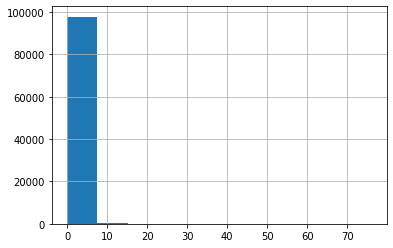

In [32]:
diabetic.number_emergency.hist() 

In [33]:
diabetic.number_emergency.value_counts() # we can leave this out given the large skew
feature_drop = ['number_emergency']

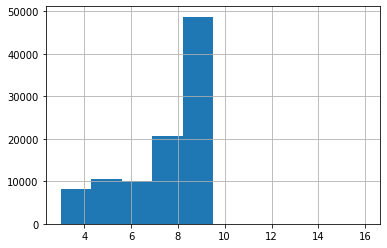

In [34]:
diabetic.number_diagnoses.hist()

In [35]:
diabetic.number_diagnoses.value_counts()
feature_drop.append('number_diagnoses')

In [36]:
diabetic.A1Cresult.value_counts() # too many None = ' not measured'

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [37]:
feature_drop.append('A1Cresult')

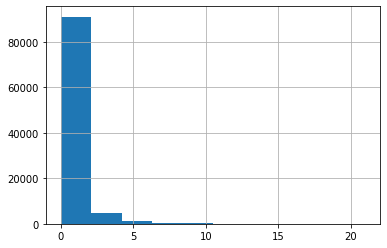

In [38]:
diabetic.number_inpatient.hist()

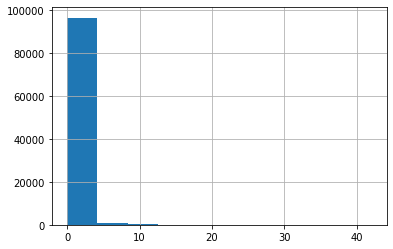

In [39]:
diabetic.number_outpatient.hist()

In [40]:
feature_drop.append('number_inpatient')
feature_drop.append('number_outpatient')
feature_drop.append('race')

In [41]:
cols = []

In [42]:
diabetic.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [43]:
# iterate through meds and check variation
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [44]:
# check major dosage changes
med_up = []
med_down = []
med_steady = []

threshold = 5000  # looking for 20000 instances of change or no change

In [45]:
# Dosage increases
for med in meds:
    count = len(diabetic[diabetic[med] == 'Up'][med])
    if count > threshold:
        med_up.append([med, count])
print(*med_up)

['insulin', 10899]


In [46]:
# Dosage decreases
for med in meds:
    count = len(diabetic[diabetic[med] == 'Down'][med])
    if count > threshold:
        med_down.append([med, count])
print(*med_down)

['insulin', 11843]


In [47]:
# Dosage No change
for med in meds:
    count = len(diabetic[diabetic[med] == 'Steady'][med])
    if count > threshold:
        med_steady.append([med, count])
print(*med_steady)

['metformin', 17677] ['glipizide', 10990] ['glyburide', 8932] ['pioglitazone', 6755] ['rosiglitazone', 5908] ['insulin', 29368]


In [87]:
# med related features

ch_dict = {
            'No':-1,
            'Ch':1
}

diabetic['change'] = diabetic['change'].replace(ch_dict)

diabetes_med = {
            'No':-1,
            'Yes':1
}
diabetic['diabetesMed'] = diabetic['diabetesMed'].replace(diabetes_med)

dose_dict = {
            'Up':10,
            'Down':-10,
            'Steady':0,
            'No':-20
}
for med in meds:
    diabetic[med] = diabetic[med].replace(dose_dict)

In [68]:
df_med = pd.concat([diabetic[meds], diabetic['change'], diabetic['diabetesMed']], axis = 1)

In [51]:
df_gend = pd.get_dummies(diabetic['gender'])

In [98]:
# extract target and encode
readmit_dict = {
    'NO': 0,
    '<30':1,
    '>30':1  
}

diabetic['readmitted'] = diabetic['readmitted'].replace(readmit_dict)

### Feature selection
<a id="Feature_Selection"></a>
<p>ICD codes from diagnoses</p>
<code>
'Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Muscoloskeletal', 'Neoplasms', 'Others', 'Respiratory'</code>
<p>Medications that were either modified in dosage or kept steady using a threshold of 5000 instances</p>
<code>'metformin_Down', 'metformin_No', 'metformin_Steady', 'metformin_Up', 'glipizide_Down', 'glipizide_No', 'glipizide_Steady', 'glipizide_Up','glyburide_Down', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up','pioglitazone_Down', 'pioglitazone_No', 'pioglitazone_Steady','pioglitazone_Up', 'rosiglitazone_Down', 'rosiglitazone_No','rosiglitazone_Steady', 'rosiglitazone_Up', 'insulin_Down','insulin_No', 'insulin_Steady', 'insulin_Up',</code>
<p>Gender</p>
<code>'Female', 'Male'</code>
<p>Age group</p>
<code> 'age'</code>

In [99]:
# Set Features and target
X = pd.concat([df_diag, df_med, df_gend, diabetic['age']], axis = 1)
y = diabetic['readmitted']

### Splitting the data

In [100]:
from sklearn.model_selection import train_test_split
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

med_model = LogisticRegression().fit(X_train, y_train)

/home/fred/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

y_pred_test = med_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[7667, 2772],
       [6128, 3044]])

In [159]:
y_pred_prob = med_model.predict_proba(X_test)[::,1]
pd.Series(med_model.coef_[0], index=X.columns) # coefficients

Circulatory                 0.054756
Diabetes                    0.038518
Digestive                   0.074287
Genitourinary               0.081906
Injury                     -0.061030
Muscoloskeletal            -0.112217
Neoplasms                  -0.178765
Others                      0.022011
Respiratory                 0.082313
metformin                  -0.013732
repaglinide                 0.006061
nateglinide                -0.001607
chlorpropamide             -0.005948
glimepiride                -0.005606
acetohexamide               0.109785
glipizide                  -0.001371
glyburide                  -0.007458
tolbutamide                -0.058300
pioglitazone               -0.000684
rosiglitazone               0.000463
acarbose                    0.023063
miglitol                    0.014810
troglitazone                0.025213
tolazamide                 -0.028415
examide                    -0.011877
citoglipton                -0.011877
insulin                    -0.004230
g

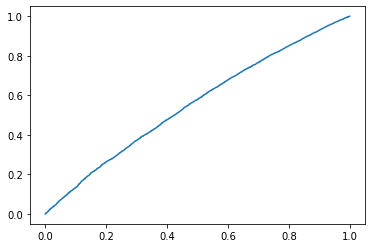

In [135]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr,tpr)

In [136]:
print('Accuracy: ',auc,'\n',  med_model.score(X_test, y_test))

Accuracy:  0.5556174591766835 
 0.5461730661363521


In [137]:
# random forest down here

## Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_train, y_train)

/home/fred/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [139]:
y_pred_test_rf = ks_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

array([[6392, 4047],
       [5147, 4025]])

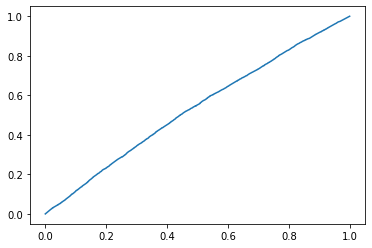

In [140]:
y_pred_proba_rf = ks_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr,tpr)

In [141]:
auc

0.5329976159548293